In [1]:
from fonctions import *

In [4]:
# récupération des articles et des tags

dic = lire_json("articlesTags.json")

new_dic = reorganiser_dico(dic)

# séparation des informations dans trois listes différentes

chemins_articles = [x for x in new_dic.keys()]

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

# Vectorisation des documents et création du model

X, V = creer_X(liste_tags)

In [5]:
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 

In [9]:
# calcul de la distance entre les vecteurs de chaque clusters
# 2 mesures : distortion et inertie
# voir : https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

distortions = [] 
inertias = []  

for k in range(1, 10): # test en allant de 1 à 9 clusters
    kmeanModel = creer_model_KM(k, X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                    'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

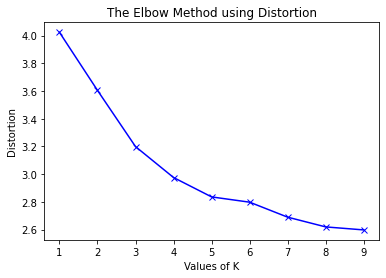

In [10]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

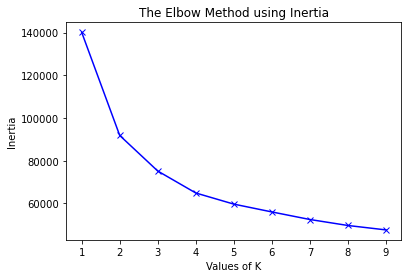

In [11]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()